#### **Multinomial (Multi_Class) Logistic Regression**


**Import the Required Libraries**


In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the Iris Dataset**


In [14]:
iris = load_iris()
X = iris.data
y = iris.target

data = pd.DataFrame(X, columns=iris.feature_names)
data["species"] = y

In [15]:
data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Split the Data into Training and Testing Sets**


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

**Create and Train the Multinomial Logistic Regression Model**


In [17]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [18]:
# Create a Logistic Regression model with multinomial option
# model = LogisticRegression(multi_class="multinomial", solver="lbfgs")

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

**Evaluate the Model**


In [19]:
accuracy_train = accuracy_score(y_train, model.predict(X_train))
print(f"Accuracy For Train Data: {accuracy_train:.2f}")

Accuracy For Train Data: 0.96


In [20]:
# Make Predictions
y_pred = model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy For Test Data: {accuracy_test:.2f}")

Accuracy For Test Data: 1.00


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



**Visualize the Confusion Matrix**


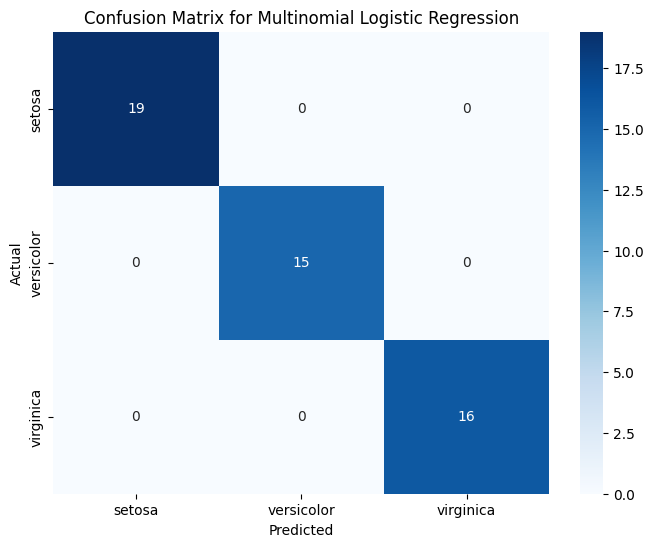

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=iris.target_names,
    yticklabels=iris.target_names,
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Multinomial Logistic Regression")
plt.show()